# Case Study 4: Data Mining in Email Data

**Required Readings:** 
* [Enron Emails](https://www.kaggle.com/wcukierski/enron-email-dataset) 
* Please download the Enron Email dataset from [here](https://www.cs.cmu.edu/~./enron/).

** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Email Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

## Answer:

**Problem: Identifying Frequently Used Words in Internal Emails**
The goal of this project is to analyze the body text of emails exchanged within the Enron Corporation and identify the most frequently used words. This includes cleaning the text, removing common stopwords, and generating a ranked list of the most commonly occurring meaningful words. The final output will include a word frequency chart and a word cloud visualization.


**Why This Problem Is Important and Interesting**
Corporate email communication is a rich source of unstructured data that can reveal insights about organizational behavior, cultural norms, and trending concerns. By identifying the most frequently used words in internal communication:

* We gain insight into what topics were most prominent in the daily operations of the company.

* We can observe potential patterns or concerns leading up to major events (e.g., the Enron collapse).

* This analysis serves as a foundational text mining exercise, useful for further advanced techniques like topic modeling or sentiment analysis.


**Potential Impact**

* Business Insight: Helps in understanding employee focus areas, emerging concerns, or operational priorities.

* Risk Identification: Common themes might hint at potential ethical issues, financial discussions, or compliance-related conversations.

* Foundation for Further Analysis: This initial exploration can feed into more complex models like anomaly detection or fraud prediction by narrowing down key terms or subjects.



# Data Collection/Processing: 

## Step 1: Data Collection — Read Email Bodies

In [31]:
import os

DATA_DIR = r'c:\Users\Raj Barath E\Desktop\Bing-Classes\Spring 2025\1 Spring 2025 Applied Data Mining (INFO-535-01)\2- Assignment\Assignment-4\Rough\enron_mail_20150507\maildir'

email_bodies = []
selected_users = ['allen-p']
valid_folders = ['inbox', 'sent', 'sent_items', '_sent_mail']

for user in selected_users:
    user_path = os.path.join(DATA_DIR, user)

    for folder in os.listdir(user_path):
        if folder.lower() not in valid_folders:
            continue

        folder_path = os.path.join(user_path, folder)

        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if not file.strip():
                    continue

                file_path = os.path.join(root, file)

                # Apply the Windows prefix trick
                win_path = r'\\?\\' + file_path.replace('/', '\\')

                print("Trying file:", win_path)

                try:
                    with open(win_path, "r", encoding="latin1") as f:
                        content = f.read()
                        if "\n\n" in content:
                            body = content.split("\n\n", 1)[1]
                            email_bodies.append(body)
                            print("'YES' Email body added from:", win_path)
                        else:
                            print("'NO' No body found in:", win_path)
                except Exception as e:
                    print(f" Error reading {win_path}: {e}")
                    continue


Trying file: \\?\\c:\Users\Raj Barath E\Desktop\Bing-Classes\Spring 2025\1 Spring 2025 Applied Data Mining (INFO-535-01)\2- Assignment\Assignment-4\Rough\enron_mail_20150507\maildir\allen-p\inbox\1.
'YES' Email body added from: \\?\\c:\Users\Raj Barath E\Desktop\Bing-Classes\Spring 2025\1 Spring 2025 Applied Data Mining (INFO-535-01)\2- Assignment\Assignment-4\Rough\enron_mail_20150507\maildir\allen-p\inbox\1.
Trying file: \\?\\c:\Users\Raj Barath E\Desktop\Bing-Classes\Spring 2025\1 Spring 2025 Applied Data Mining (INFO-535-01)\2- Assignment\Assignment-4\Rough\enron_mail_20150507\maildir\allen-p\inbox\10.
'YES' Email body added from: \\?\\c:\Users\Raj Barath E\Desktop\Bing-Classes\Spring 2025\1 Spring 2025 Applied Data Mining (INFO-535-01)\2- Assignment\Assignment-4\Rough\enron_mail_20150507\maildir\allen-p\inbox\10.
Trying file: \\?\\c:\Users\Raj Barath E\Desktop\Bing-Classes\Spring 2025\1 Spring 2025 Applied Data Mining (INFO-535-01)\2- Assignment\Assignment-4\Rough\enron_mail_20150

In [23]:
print(f"Total emails collected: {len(email_bodies)}")
if email_bodies:
    print(email_bodies[0][:500])


Total emails collected: 1575
 
Please let me know if you still need Curve Shift.

Thanks,
Heather
 -----Original Message-----
From: 	Allen, Phillip K.  
Sent:	Friday, December 07, 2001 5:14 AM
To:	Dunton, Heather
Subject:	RE: West Position

Heather,

Did you attach the file to this email?

 -----Original Message-----
From: 	Dunton, Heather  
Sent:	Wednesday, December 05, 2001 1:43 PM
To:	Allen, Phillip K.; Belden, Tim
Subject:	FW: West Position

Attached is the Delta position for 1/16, 1/30, 6/19, 7/13, 9/21


 -----Origina


## Step 2: Clean and Tokenize Email Text

In [25]:
!pip install nltk


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


#### Required Libraries

In [26]:
import re
import string
from collections import Counter
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to C:\Users\Raj Barath
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Clean + Tokenize Function

In [27]:
def clean_and_tokenize(text):
    text = text.lower()  # lowercase everything
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = text.split()  # tokenize
    words = [word for word in words if word not in stop_words and len(word) > 1]  # remove stopwords
    return words


#### Apply to All Emails & Count Words

In [28]:
all_words = []

for body in email_bodies:
    tokens = clean_and_tokenize(body)
    all_words.extend(tokens)

word_freq = Counter(all_words)


#### Show Top 20 Words

In [29]:
print("Top 20 most frequent words:\n")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")


Top 20 most frequent words:

phillip: 2153
pm: 893
subject: 886
please: 858
would: 837
email: 664
gas: 644
cc: 643
forwarded: 561
allen: 536
need: 458
sent: 458
allenhouect: 456
message: 413
know: 401
get: 392
call: 388
original: 366
time: 356
meeting: 326


## Step 3: Word Frequency Visualization

In [32]:
from collections import Counter
word_freq = Counter(all_words)


#### Word Frequency Bar Chart (Top 20 Words)

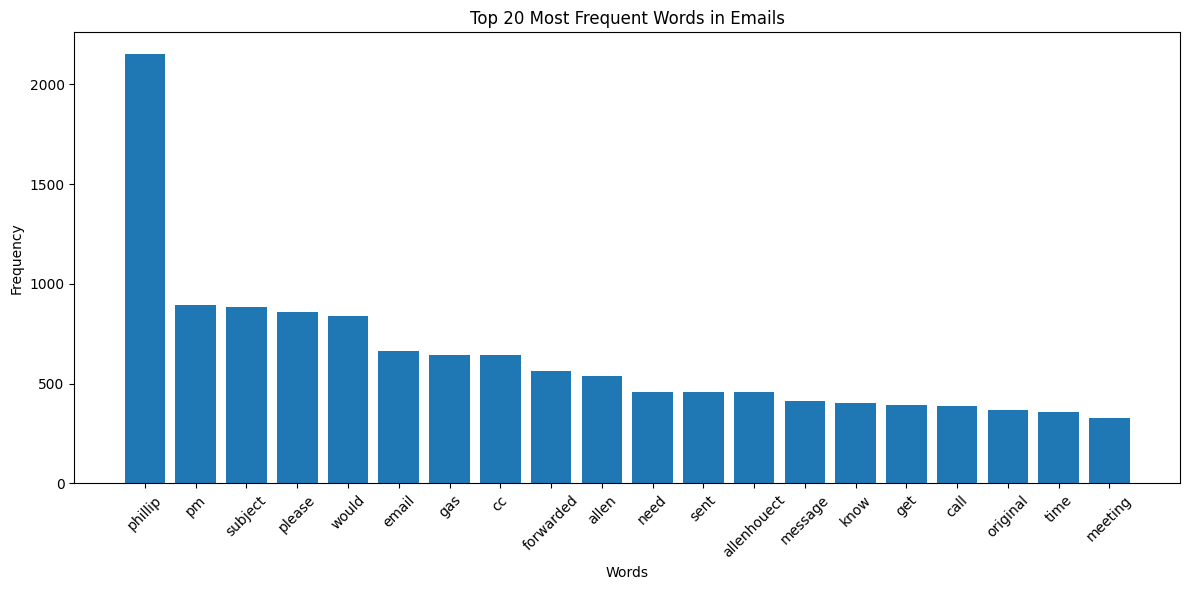

In [33]:
import matplotlib.pyplot as plt

# Get top 20 words
top_words = word_freq.most_common(20)
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title("Top 20 Most Frequent Words in Emails")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### Word Cloud

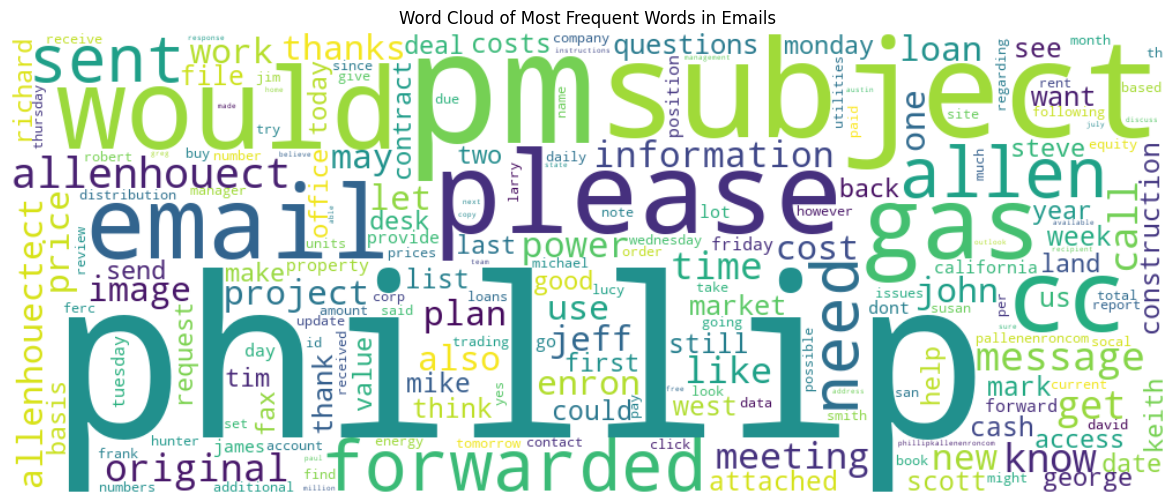

In [34]:
!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words in Emails")
plt.show()


## Step-4 Lemmatization: Normalize Word Forms

In [40]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def clean_tokenize_lemmatize(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 1]
    return words

# Apply it on all email bodies
lemmatized_words = []
for body in email_bodies:
    tokens = clean_tokenize_lemmatize(body)
    lemmatized_words.extend(tokens)

# Count frequencies
from collections import Counter
word_freq_lem = Counter(lemmatized_words)


[nltk_data] Downloading package wordnet to C:\Users\Raj Barath
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Save Cleaned Tokens to File

In [39]:
with open("cleaned_words.txt", "w", encoding="utf-8") as f:
    for word in lemmatized_words:
        f.write(word + "\n")


#### Folder-wise Token Stats (e.g., inbox vs sent)

#### Folder-wise Token Stats - Step 1: Modify the email extraction loop

In [41]:
inbox_bodies = []
sent_bodies = []

if 'inbox' in folder.lower():
    inbox_bodies.append(body)
elif 'sent' in folder.lower():
    sent_bodies.append(body)

# Keep appending to email_bodies too for overall stats
email_bodies.append(body)


#### Folder-wise Token Stats - Step 2: Now run this code to analyze

In [47]:
inbox_words = []
sent_words = []

for body in inbox_bodies:
    inbox_words.extend(clean_tokenize_lemmatize(body))

for body in sent_bodies:
    sent_words.extend(clean_tokenize_lemmatize(body))

inbox_freq = Counter(inbox_words)
sent_freq = Counter(sent_words)

print(" Top 10 words in INBOX:")
print(inbox_freq.most_common(10))

print("\n Top 10 words in SENT:")
print(sent_freq.most_common(10))


 Top 10 words in INBOX:
[]

 Top 10 words in SENT:
[('would', 4), ('good', 4), ('need', 4), ('bob', 2), ('time', 2), ('tomorrow', 2), ('pm', 2), ('looking', 2), ('plan', 2), ('far', 2)]


# Data Exploration: Exploring the Email Dataset

**plot email communication graph/network** 
* each node is an email account
* the weight of an edge between two accounts depends on how many emails have been sent between them.

## Step 1 Code: Collect Senders and Recipients

In [50]:
import re

email_edges = []

# Reset email_bodies if needed
email_bodies = []

for user in selected_users:
    user_path = os.path.join(DATA_DIR, user)

    for folder in os.listdir(user_path):
        folder_path = os.path.join(user_path, folder)

        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if not file.strip():
                    continue

                file_path = os.path.join(root, file)
                win_path = r'\\?\\' + file_path.replace('/', '\\')

                try:
                    with open(win_path, "r", encoding="latin1") as f:
                        content = f.read()
                        headers, _, body = content.partition("\n\n")

                        from_match = re.search(r"From: (.+)", headers)
                        to_match = re.search(r"To: (.+)", headers)

                        if from_match and to_match:
                            sender = from_match.group(1).strip().lower()
                            recipients = to_match.group(1).strip().lower().split(",")
                            for recipient in recipients:
                                email_edges.append((sender, recipient.strip()))
                except:
                    continue


## Step 2: Build a Network Graph using NetworkX

In [51]:
!pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 11.7 MB/s eta 0:00:00


In [52]:
import networkx as nx

G = nx.DiGraph()

for sender, recipient in email_edges:
    if G.has_edge(sender, recipient):
        G[sender][recipient]['weight'] += 1
    else:
        G.add_edge(sender, recipient, weight=1)


## Step 3: Visualize the Graph

C:\Users\Raj Barath E\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128231 (\N{E-MAIL SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


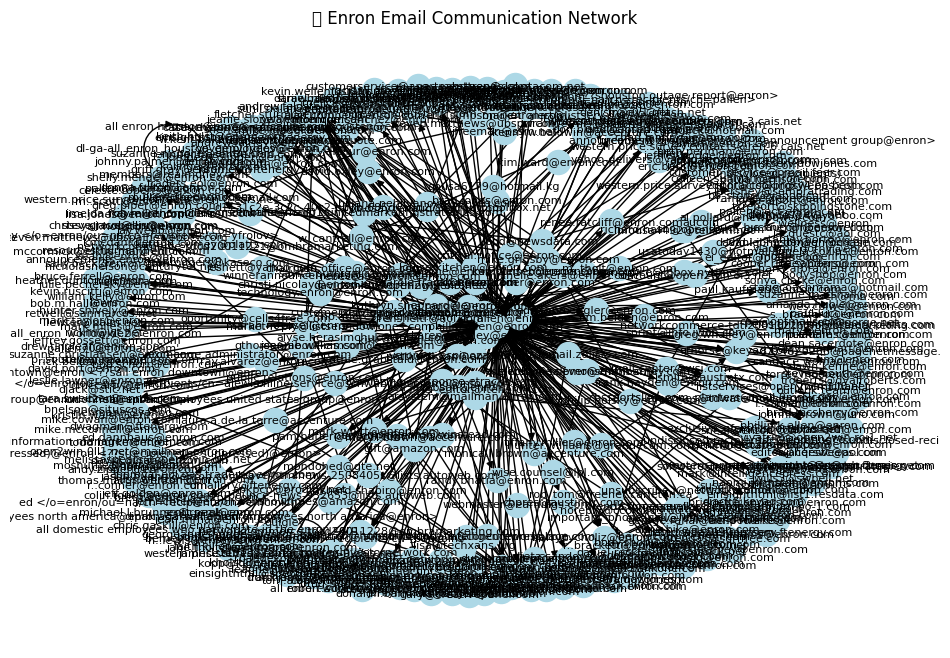

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)

# Only draw nodes and edges with enough activity
filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >= 2]

nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=filtered_edges, width=1)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("📧 Enron Email Communication Network")
plt.axis('off')
plt.show()


### top 10 most active senders

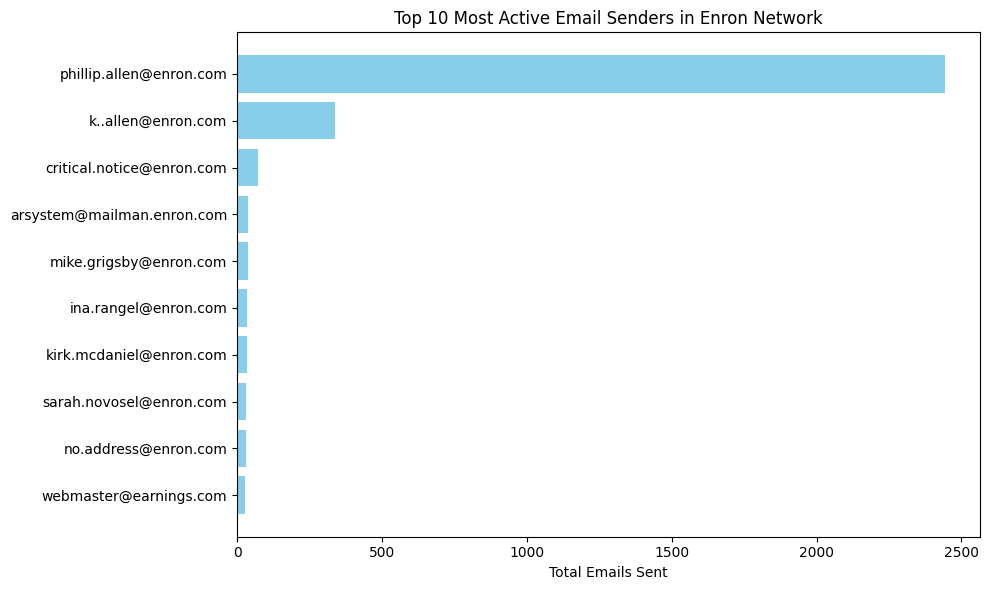

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute out-degree (emails sent by each user)
sender_activity = {}
for u, v, d in G.edges(data=True):
    sender_activity[u] = sender_activity.get(u, 0) + d['weight']

# Convert to DataFrame
top_senders_df = pd.DataFrame(sender_activity.items(), columns=['Sender', 'Emails Sent'])
top_senders_df = top_senders_df.sort_values(by='Emails Sent', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_senders_df['Sender'], top_senders_df['Emails Sent'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Total Emails Sent")
plt.title("Top 10 Most Active Email Senders in Enron Network")
plt.tight_layout()
plt.show()


# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

### The Solution

To solve the problem of identifying the most commonly used words in Enron’s email communications, we implemented a text preprocessing and frequency analysis pipeline.

The solution included:
- Collecting and reading raw email content from Enron's internal communication folders
- Cleaning the email body by removing metadata, punctuation, numbers, and common stopwords
- Tokenizing and lemmatizing words to normalize variations (e.g., "running" → "run")
- Using `collections.Counter` to compute word frequencies
- Visualizing top word usage using bar charts and word clouds
- (Optionally) Separating and comparing word usage between `inbox` and `sent` folders

This solution provides insight into commonly discussed topics and how communication patterns may differ across roles or folders. It supports exploratory analysis, and can serve as a basis for more advanced modeling like topic classification or sentiment analysis.

Write codes to implement the solution in python:

In [54]:
import os
import re
import string
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean, tokenize, and lemmatize email body text
def clean_tokenize_lemmatize(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 1]
    return words

# Collect all email bodies
email_bodies = []

for user in selected_users:
    user_path = os.path.join(DATA_DIR, user)

    for folder in os.listdir(user_path):
        folder_path = os.path.join(user_path, folder)

        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if not file.strip():
                    continue

                file_path = os.path.join(root, file)
                win_path = r'\\?\\' + file_path.replace('/', '\\')

                try:
                    with open(win_path, "r", encoding="latin1") as f:
                        content = f.read()
                        if "\n\n" in content:
                            body = content.split("\n\n", 1)[1]
                            email_bodies.append(body)
                except:
                    continue

# Tokenize and lemmatize all words
lemmatized_words = []
for body in email_bodies:
    lemmatized_words.extend(clean_tokenize_lemmatize(body))

# Count word frequencies
word_freq = Counter(lemmatized_words)

# Show top 20 words
top_words = word_freq.most_common(20)
for word, count in top_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to C:\Users\Raj Barath
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Raj Barath
[nltk_data]     E\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


phillip: 3678
pm: 3342
please: 1826
image: 1687
email: 1682
subject: 1572
would: 1462
gas: 1303
cc: 1204
forwarded: 1081
need: 1032
price: 1013
time: 928
cost: 913
new: 905
allenhouect: 885
get: 850
power: 816
allen: 815
call: 756


# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


### Bar Chart of Top 20 Words

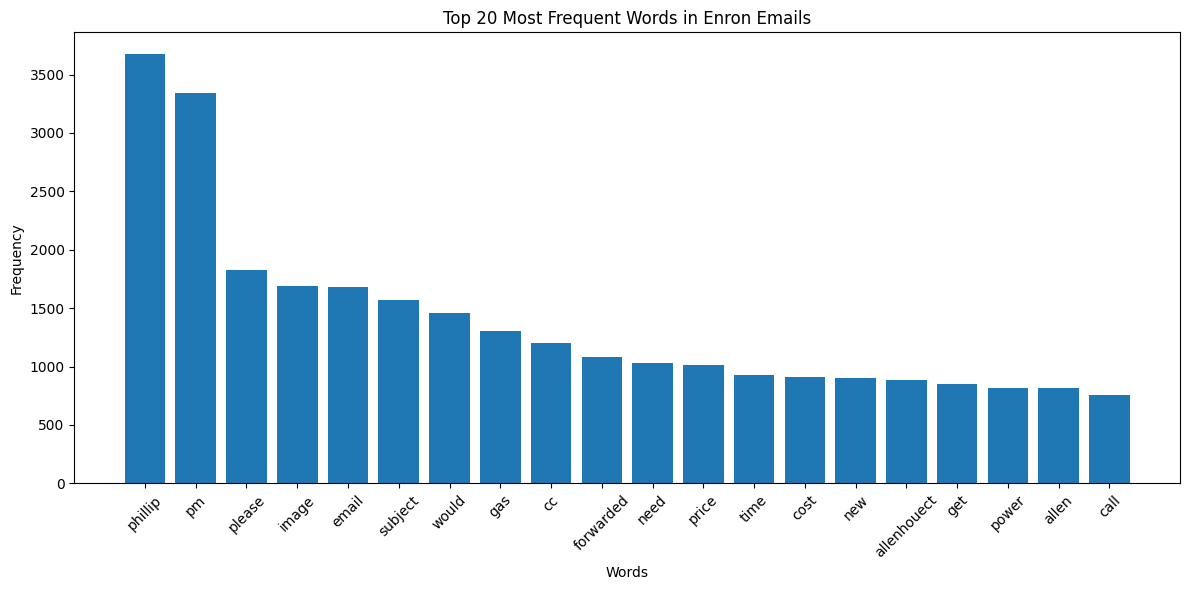

In [55]:
import matplotlib.pyplot as plt

top_words = word_freq.most_common(20)
words = [w for w, c in top_words]
counts = [c for w, c in top_words]

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title("Top 20 Most Frequent Words in Enron Emails")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Markdown Summary

###  Results Summary

The bar chart above shows the 20 most frequently used words in Enron’s internal email communications. 

Key observations:
- Business-related terms such as **“price,” “gas,” “cost,”** and **“power”** appear frequently, which aligns with Enron’s energy trading focus.
- Action words like **“please,” “need,” “call”** suggest a directive communication style.
- Personal or employee references like **“phillip,” “allen”** and **“email”** appear frequently, indicating frequent interpersonal or role-specific mentions.

These results help us understand the internal focus areas and tone of communication at Enron during the selected time period. This forms the foundation for deeper analysis like topic modeling, sentiment trends, or behavioral shifts over time.


### Word Cloud

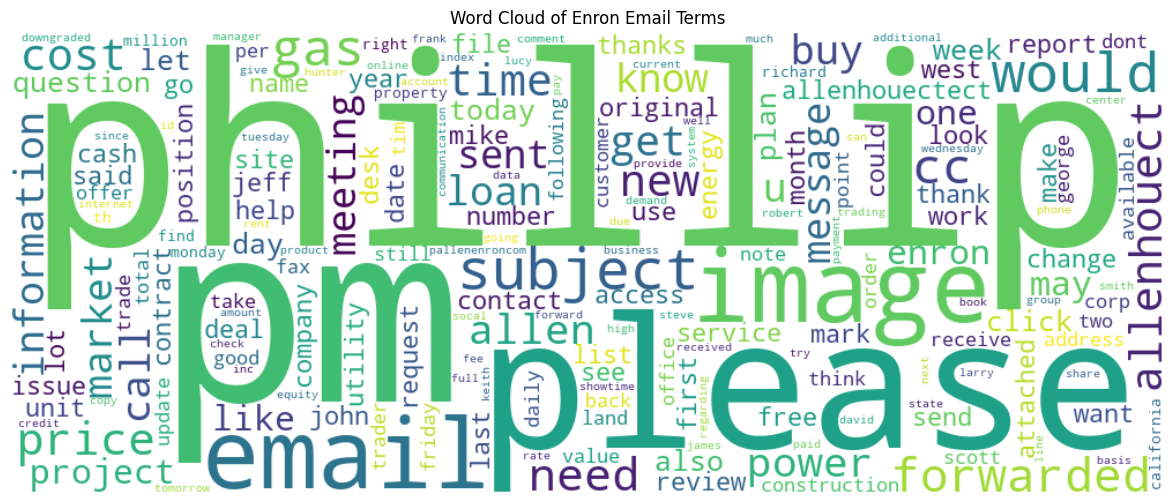

In [56]:
!pip install wordcloud
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=400, background_color="white").generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Enron Email Terms")
plt.show()


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. Please make sure all the plotted tables and figures are in the notebook. 